In [332]:
import pandas as pd
import matplotlib.pyplot as mp
import re
pd.set_option('display.max_rows', 60000 )
dfstopwords = pd.read_json("~/Desktop/stopwords.json")
df = pd.read_csv("~/Desktop/the_office_lines_scripts.csv")
#creates a df all lower case
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

In [333]:
#Here I am creating a DF that has two columns called speaker and count,
#count has the quantity each time the speaker appears 
df['speaker'] = df['speaker']
df['count'] = df.groupby('speaker')['speaker'].transform('count')

In [334]:
#Here is my clean up of the original DF
#I create a new DF with just a speaker column and deleteduplicate names, I also label the stopwords column so that it is easier for me
#I add spacing around the stop words incase contain.() is used ie substring "a" would delete a lot of strings
dfscript = df.drop_duplicates(subset = ["speaker"])
dfstopwords.columns = ['words']
dfstopwords['words'] = ' ' + dfstopwords['words'] + ' '
#I create a list of the stopwords df and also add a few more to decrease number of unwanted repeated, mispelled, and inanimate 
#characters
stopwords_list = dfstopwords['words'].values.tolist()
stopwords_list.extend([ "&", ":", ",", "\[", "\]", "/", "cheal","computer","everyone", "group","guests","ii", "together","tv","radio", "voice"])
rstr = '|'.join(stopwords_list)
stopwords=stopwords_list.copy()
#I then filter out stopwords in the speaker column and create two new ones
dfscript = dfscript[~dfscript.speaker.str.contains(rstr)]
df1 = df[~df.speaker.str.contains(rstr)]

In [335]:
#I create a copy of filtered and dropduplicated df of only speaker and count, I sort count by decending order and reset the indicies
dfspeakers = dfscript[['speaker','count']].copy()
dfspeakers.sort_values(by=['count'], ascending = False, inplace= True)
dfspeakers = dfspeakers.reset_index(drop=True)

In [336]:
#Here I displayed the total number of character after I filtered for groups of already accounted for characters, inanimate ones,
#songs..etc. However there are still issues with the data that I noticed and was not able to adjust for given the time. 
print("Character bearkdown:\nNumber of Speakers/Characters are ", len(dfspeakers))
print("The Character names, listed from most times spoke are:\n", dfspeakers['speaker'])

Character bearkdown:
Number of Speakers/Characters are  628
The Character names, listed from most times spoke are:
 0                            michael
1                             dwight
2                                jim
3                                pam
4                               andy
5                              kevin
6                             angela
7                              oscar
8                               erin
9                               ryan
10                            darryl
11                           phyllis
12                             kelly
13                               jan
14                              toby
15                           stanley
16                          meredith
17                             holly
18                            nellie
19                             creed
20                              gabe
21                            robert
22                             david
23                             ka

michael has the most lines across all episodes being 12141


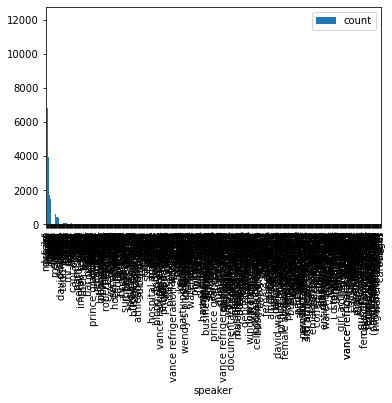

,speaker,count
0,michael,12141
1,dwight,7531
2,jim,6817
3,pam,5376
4,andy,3968
5,kevin,1708
6,angela,1695
7,oscar,1490
8,erin,1469
9,ryan,1379


In [337]:
#I interpreted the question as who has the most lines but as I reached the deadline of this project I worry I misunderstood the question
#assuming this was what was wanted, I already had a df of characters and count of lines spoke through the entire show that was 
#sorted in decending order so I located the location of the first value of the speaker column and found the answer.
print(dfspeakers['speaker'].iloc[0], "has the most lines across all episodes being", dfspeakers['count'].iloc[0])
#Here I tried to display the characters with their count of lines spoken via bar graph, however since the value of character is significant
#the display of the graph is not ideal. This can be imporved by possibly fixing figure values or by only displaying main characters. 
dfspeakers.plot(x="speaker", y=["count"], kind="bar")
dfspeakers
mp.show()
#I displayed this df so that a better display can be shown
dfspeakers

In [338]:
# Here is my def and initializations for the print char avges. 
dft = df1[['speaker', 'line_text']]
character_sum = []
character_line = []
character_lines = {}
character_averages = {}
i = 0
for index, row in dft.iterrows():
    if not row['speaker'] in character_lines:
        if '[' in row['speaker']:
            continue
        character_lines[row['speaker']] = []
    line = re.sub("\[.*?\]", '', row['line_text'])
    character_lines[row['speaker']].append(len(line.split()))
for key in character_lines:
    average = 0
    k = 0
    for item in character_lines[key]:
        average += item
        k += 1
    average /= k
    character_averages[key] = average


def print_char_averages():
    for key in character_averages:
        print(f"Average number of words in {key}'s lines: {round(character_averages[key])}\n")

In [339]:
#similar as above
dfs = dft.groupby(['speaker'])['line_text'].count().reset_index(name = 'count').sort_values(['count'],ascending = False)
print("\nThe average of words per line for each character is: \n")
print_char_averages()


The average of words per line for each character is: 

Average number of words in michael's lines: 14

Average number of words in jim's lines: 9

Average number of words in pam's lines: 9

Average number of words in dwight's lines: 11

Average number of words in jan's lines: 10

Average number of words in michel's lines: 8

Average number of words in todd packer's lines: 15

Average number of words in phyllis's lines: 8

Average number of words in stanley's lines: 8

Average number of words in oscar's lines: 9

Average number of words in angela's lines: 9

Average number of words in kevin's lines: 8

Average number of words in ryan's lines: 10

Average number of words in man's lines: 8

Average number of words in roy's lines: 8

Average number of words in documentary crew member's lines: 15

Average number of words in mr. brown's lines: 11

Average number of words in toby's lines: 10

Average number of words in kelly's lines: 11

Average number of words in meredith's lines: 8

Average

In [340]:
#here are my functions for print char lines and print char most used. 
#I needed to filter out stopwords from the line text col so that when finding common words used, the basic stopwords
#char use daily would not be listed or accounted for
def print_char_lines():
    for key in character_lines:
        print(f"{key}'s lines: {character_lines[key]}")


def print_char_most_used():
    common_words = {}
    for key in character_lines:
        for item in character_lines[key]:
            for word in item:           #there seems to be an issue here in Jupyder, I am unsure if the reason as to why 
                if key in common_words:        #it runs in spyder and produces an output but does not her. 
                    if word.lower() in common_words[key]:        
                        common_words[key][word.lower()] += 1
                    else:
                        common_words[key][word.lower()] = 1
                else:
                    common_words[key] = {word.lower() : 1}
    for key in common_words:
        mcw = max(common_words[key], key=common_words[key].get)
        mcv = common_words[key][mcw]
        if mcv > 1:
            print(f"{key} says, '{mcw}' {mcv} times.")
        else:
            print(f"{key} has never said the same word more than once.")
 

In [341]:
#This did not give me an issue on Spyder, unsure how to solve this problem.
#I will attache a copy of the output given in spyder. 
#here I implement the funtion I defined above to find the most common words said by each character. 
#for example, in the output given in spyder, it says "isabel says, 'whack!' 3 times."
for item in stopwords:
    dfscript = dfscript.drop(dfscript[dfscript.speaker.str.contains(item)].index)

dfscript = pd.DataFrame().assign(speaker=dfscript['speaker'], count=dfscript['count'])
print_char_most_used()

TypeError: 'int' object is not iterable

In [ ]:
#problem # 5
#I need to iterate over rows and compare the speaker column
#with the episode column. I need to check and store a dataframe that has the number/sum of 
#episodes a character speaks with the speaker name in another column then subtract the total number of episode by that value
#basically need to add 1 everytime char name appears and episode number does not equal episode before last spoke.
for index, row in df.iterrows():
    print(row['episode'],row['speaker'])


In [342]:
strTWSS = "that's what she said"
dfTWSS = df[df.line_text.str.contains(strTWSS)]
print("\"That's what she said\" was said a total of",len(dfTWSS))
dfTWSS.head()

"That's what she said" was said a total of 37


,id,season,episode,scene,line_text,speaker,deleted,count
2544,2545,2,2,24,that's what she said. pam?,michael,False,12141
2590,2591,2,2,34,does that include 'that's what she said'?,jim,False,6817
2593,2594,2,2,34,that's what she said!,michael,False,12141
5324,5325,2,10,2,"a, that's what she said, and b, i wanted it to...",michael,False,12141
6321,6322,2,12,33,that's what she said.,dwight,False,7531


In [ ]:
#Problem # 7
#I need to find the total number of lines each character said 
#per episode then divide those numbers by the total number of seasons
#recall this 
#df['count'] = df.groupby('speaker')['speaker'].transform('count')
#i think a different variation of this will be helpful for this problem
# i believe I can possible count the number of seasons/episode and use count and diplay each time a value appears in a season or episode 

In [ ]:
#These are my own made questions

print("How many lines does the finger lakes guy have?")
print("The finger lakes guy has", df['speaker'].value_counts()['finger lakes guy'], "line.")

print("\nHow many deleted scenes are there?")
print("There are", df.deleted.sum(), "deleted scenes.")

print("\nWhat percent of lines are deleted?")
lt = len(df['line_text'])
ds = df.deleted.sum()
avg = (ds/lt)*100
print("The percent of lines deleted is {:0.2f}%.".format(avg))

print("\nHow many times was the finer lakes guy mentions?")
flg = df.line_text.str.count("finger lakes guy").sum()
print("He was mentioned",flg,"time.")